In [581]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
from scipy.stats import chi2
from scipy.stats import norm

rng = default_rng()

In [582]:
def length_chi(xs, gamma):
    n = len(xs)
    q1 = chi2.ppf((1 + gamma) / 2, n)
    q2 = chi2.ppf((1 - gamma) / 2, n)
    squares_sum = np.sum(xs ** 2)

    l = squares_sum / q1
    r = squares_sum / q2
    return (r - l) / 2


def length_norm(xs, gamma):
    q1 = norm.ppf((3 + gamma) / 4, loc=0, scale=1)
    q2 = norm.ppf((3 - gamma) / 4, loc=0, scale=1)
    n = len(xs)
    avg = np.average(xs)

    l = n * (avg ** 2) / (q1 ** 2)
    r = n * (avg ** 2) / (q2 ** 2)

    return (r - l) / 2

In [583]:
def generate_sample(n):
    return rng.normal(0,1,size=n)

def avg_len(len_fun, n, iterations = 100, gamma = 0.9):
    avg = 0
    for i in range(iterations):
        avg += len_fun(generate_sample(n), gamma)
    return avg / iterations



In [599]:

def draw_chi(n = 10, iterations = 100, step = 5, log = False) :
    x = np.arange(2, n, step)    # start,stop,step

    if log:
        plt.yscale('log')
        plt.xscale('log')

    gamma = 0.3

    chi = lambda t: avg_len(length_chi, t, iterations, gamma)
    # norm_len = lambda t: avg_len(length_norm, t, iterations)

    y = list(map(chi, x))
    plt.plot(x, y, label="chi length")

    # ref = lambda n: 1 / ((1 - gamma) * n ** (gamma))
    # y = list(map(ref, x))
    # plt.plot(x, y, label="ref")

    plt.title("First interval")
    plt.grid()
    plt.legend()

    plt.show()


def draw_norm(n = 10, iterations = 100, step = 5) :
    x = np.arange(2, n, step)    # start,stop,step

    gamma = 0.5
    norm_len = lambda t: avg_len(length_norm, t, iterations, gamma)
    y = list(map(norm_len, x))
    plt.plot(x, y, label="Second interval")

    plt.title("2")
    plt.grid()
    plt.legend()

    plt.show()



Сравнение длин доверительных интервалов показало, что первый убывает с увеличением $n$, а второй ведет себя случайным образом

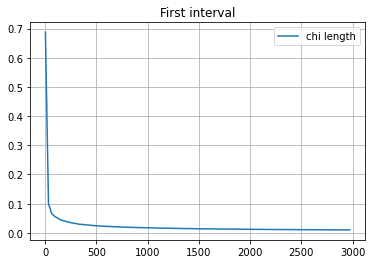

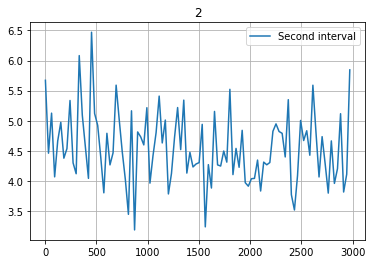

CPU times: user 5.98 s, sys: 46.1 ms, total: 6.03 s
Wall time: 6.02 s


In [600]:
%%time
draw_chi(3000, step=30)
draw_norm(3000, step=30)

Интересно, что длина первого доверительного интервала убывает практически линейно в двойном логарифмическом масштабе, т.е. зависимость близка к $len = k n^t$. Правда $t$, судя по всему, не совсем константа, т.к. прямая все-таки немного меняет угол наклона


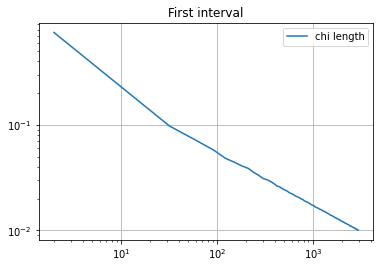

CPU times: user 3.42 s, sys: 51.5 ms, total: 3.47 s
Wall time: 3.47 s


In [602]:
%%time
draw_chi(3000, step=30, log = True)


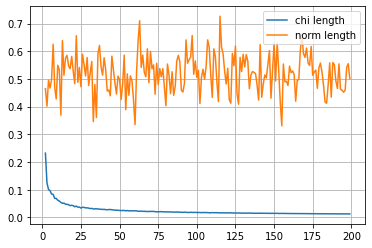

CPU times: user 10.2 s, sys: 69.4 ms, total: 10.3 s
Wall time: 10.3 s


In [502]:
%%time
draw(200)
